# Classify Handwritten digits using MLP

## Dataset
**MNIST** ("Modified National Institute of Standards and Technology") is the “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The MNIST database contains 60,000 training images and 10,000 testing images.

<img src="https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png">

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from tensorflow.keras.datasets import mnist

# from tensorflow.keras.utils import to_categorical

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# from tensorflow.keras.utils import model_to_dot
# from IPython.display import SVG

# Data Loading and Preprocessing

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.ndim

3

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
first_image = X_train[0, :, :]

In [7]:
import matplotlib.pyplot as plt

In [8]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys)

In [9]:
y_train[0]

5

In [10]:
import numpy as np

In [11]:
num_classes = len(np.unique(y_train))
num_classes

10

In [12]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

In [13]:
X_train.shape[1:]

(28, 28)

In [14]:
input_dim = np.prod(X_train.shape[1:])
input_dim

784

In [15]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be matrices with 784 (= 28 * 28) features.
X_train = X_train.reshape(60000, input_dim).astype('float32')
X_test = X_test.reshape(10000, input_dim).astype('float32')

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test.shape

(10000, 784)

In [18]:
X_train[0].shape

(784,)

In [19]:
X_train.max()

255.0

In [20]:
# Scales the training and test data to range between 0 and 1.
max_value = X_train.max()
X_train /= max_value # sum = sum + 1 # sum += 1
X_test /= max_value

In [21]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# We convert the class labels to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Multilayer Perceptron Model

Technically, we're building a perceptron with one hidden layer.

## Build the Model

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()

In [27]:
from tensorflow.keras.layers import Dense

In [28]:
input_dim

784

In [29]:
# Add Layer 1
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))

In [30]:
# Add Layer 2
model.add(Dense(num_classes, activation='softmax'))

## Summarize the Model

The summary includes information about:

- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Visualize the Model

In [32]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

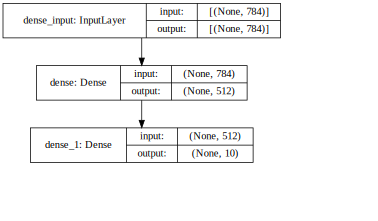

In [33]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Train the Model

In [34]:
# Trains the model, iterating on the training data in batches of 32 in 3 epochs.

# Configures the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trains the model for a fixed number of epochs (iterations on a dataset)
model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

## Model Evaluation

In [ ]:
# Test accuracy
model.evaluate(X_test, y_test)

## Predicting on Test Images

In [ ]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [ ]:
model.predict(X_test[[0]])

In [ ]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [ ]:
model.predict(X_test[[1]])

# model.save("model.h5", save_format='h5')